# Experiments with real data (all patients)

This notebook reproduces Figures 4, 7 in the paper. It requires output files generated by executing the scripts `scripts/therapy_compute_cf_mdps.sh` (with the `unobserved_reward=inf` option) and `scripts/therapy_experiment.sh`.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import matplotlib.ticker as mtick
from src import utils
from src.utils import get_fig_dim
from IPython.display import clear_output
import matplotlib.pyplot as plt
from src.therapy_mdp import Therapy_MDP
from scipy.stats import entropy

sns.set_theme(context='paper', style='ticks', font_scale=1)

In [3]:
width_pt = 397
palette = sns.color_palette('husl', 7)
type_dict = {
    'mdp_entropy' : float,
    'cf_entropy' : float,
    'id' : int,
    'k' : int,
    'avg_cf_outcome' : float,
    'num_of_explanations' : int
}

In [4]:
files = glob.glob("./outputs/therapy_exp*.json")

dicts = []
for fl_id, fl in enumerate(files):
    clear_output(wait=True)
    print('Reading file ' + str(fl_id+1)+'/'+str(len(files)))
    with open(fl,"r") as f:
        js = json.load(f)
        dicts.append(js)

input_df = pd.DataFrame(dicts)

Reading file 1302/1302


In [5]:
data_df = input_df.astype(type_dict) # Fix types
data_df = data_df.rename(columns={'mdp_entropy': 'Initial entropy', 'cf_entropy': 'Counterfactual entropy', 'avg_cf_outcome' : 'Average counterfactual outcome', 'num_of_explanations': 'Number of counterfactual explanations'}) # Rename columns
data_df['Normalized counterfactual outcome'] = data_df['Average counterfactual outcome']/data_df['horizon']

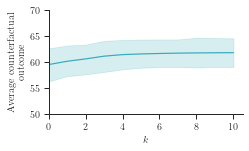

In [6]:
utils.latexify(font_size=10, legend_font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.65)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

temp_df = data_df[data_df['k']<=10]
sns.lineplot(data=temp_df, x='k', y='Average counterfactual outcome', color=palette[4], err_style='band', ax=ax)
sns.despine()

ax.set_xlim(left=0)
ax.set_ylim(bottom=50, top=70)
ax.set_xlabel(r'$k$')
ax.set_ylabel('Average counterfactual\n outcome')

fig.tight_layout()
fig.savefig('figures/therapy_outcome_vs_k.pdf')

In the following cell, set the value of the parameter `k` for Figures 4(a) and 7. In the paper, we present results under `k = 1, 2, 3, 5`.

In [10]:
kap=3

In [7]:
init_df = data_df[data_df['k']==0].set_index('id')
improved_df = data_df[data_df['k']==kap].set_index('id')
comp_df = init_df
comp_df['Average counterfactual improvement'] = (improved_df['Average counterfactual outcome'] - init_df['Average counterfactual outcome'])/init_df['Average counterfactual outcome']*100

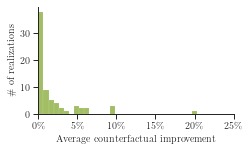

In [8]:
utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.65)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

sns.histplot(data=comp_df, x="Average counterfactual improvement", color=palette[2], stat='count', ax=ax, bins=200)
sns.despine()

ax.set_xlim(left=0, right=25)
ax.set_ylabel(r'\# of realizations')
ax.set_xlabel('Average counterfactual improvement')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

fig.tight_layout()
fig.savefig('figures/therapy_distribution_{kap}.pdf'.format(kap=kap))

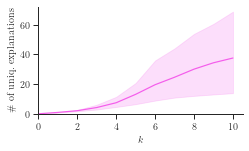

In [9]:
utils.latexify(font_size=10)

fig_height, fig_aspect = get_fig_dim(width_pt, fraction=0.65)
fig, ax = plt.subplots(figsize=(fig_height*fig_aspect,fig_height))

temp_df = data_df[data_df['k']<=10]
sns.lineplot(data=temp_df, x='k', y='Number of counterfactual explanations', color=palette[6], err_style='band', ax=ax)
sns.despine()

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'\# of uniq. explanations')

fig.tight_layout()
fig.savefig('figures/therapy_expl_vs_k.pdf')